In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from multiLevelCoSurrogates.config import data_dir

In [3]:
df = pd.read_csv('{}timing_summary.csv'.format(data_dir))
df.head()

,Unnamed: 0,function,surrogate,usage,repetition,gen_int,lambda_pre,time
0,0,bohachevsky,Kriging,reg,0,1,2,2.465569
1,1,bohachevsky,Kriging,reg,0,2,2,975.813294
2,2,bohachevsky,Kriging,reg,0,3,2,151.718057
3,3,bohachevsky,Kriging,reg,0,5,2,6.719542
4,4,bohachevsky,Kriging,reg,0,10,2,23.358003


In [4]:
df.groupby(by=['function', 'surrogate', 'usage', 'gen_int'])['time'].mean()

function          surrogate     usage      gen_int
bohachevsky       Kriging       reg        1            6.315216
                                           2          402.690602
                                           3           89.306009
                                           5           25.631838
                                           10          16.144881
                                scaled-MF  1            3.670082
                                           2           38.697520
                                           3          155.163241
                                           5           27.625730
                                           10          26.880650
                  NoSurrogate   reg        0            0.066830
                  RBF           reg        1           25.267990
                                           2          138.806736
                                           3           15.389102
                                       

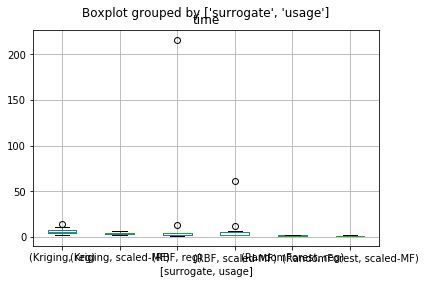

In [5]:
df[(df['function']=='bohachevsky') & (df['gen_int']==1)].boxplot(column='time', by=['surrogate', 'usage'])    

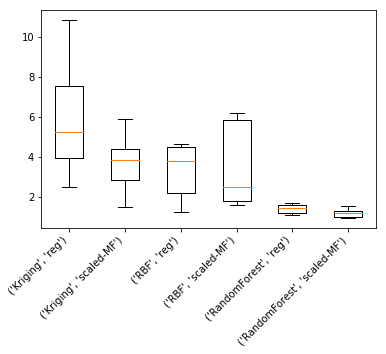

In [7]:
sub_df = df[(df['function']=='bohachevsky') & (df['gen_int']==1)]
labels, data = zip(*[(key, values['time']) for key, values in sub_df.groupby(by=['surrogate', 'usage'])])

plt.figure(figsize=(12,8))
plt.boxplot(data, sym='')
plt.xticks(np.arange(len(labels))+1, labels, rotation=45, horizontalalignment='right')
plt.show()

/scratch/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


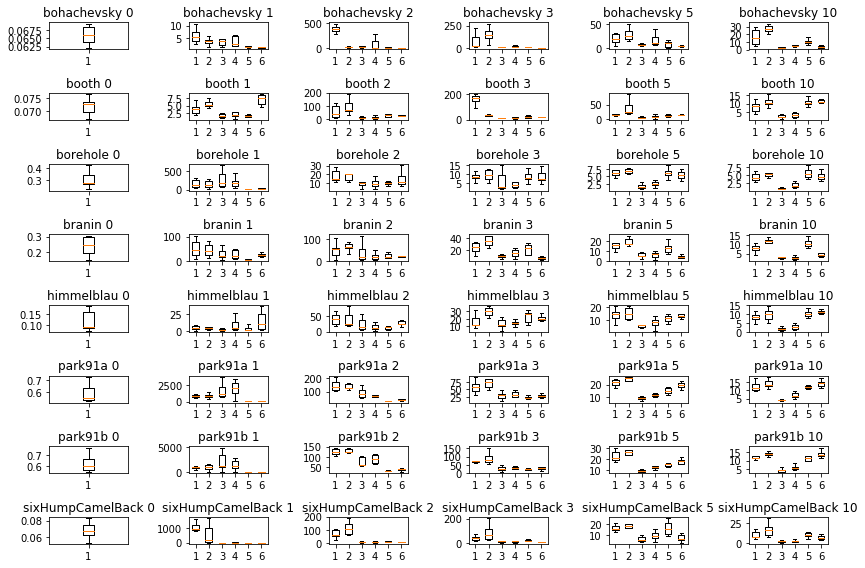

In [13]:
num_funcs = len(df['function'].unique())
num_gen_ints = len(df['gen_int'].unique())

plt.figure(figsize=(12,8))
idx = 0
for func, func_df in df.groupby(by=['function']):
    for gen_int, gen_int_df in func_df.groupby(by=['gen_int']):
        idx += 1
        sub_df = gen_int_df[(gen_int_df['function']==func) & (df['gen_int']==gen_int)]
        labels, data = zip(*[(key, values['time']) for key, values in sub_df.groupby(by=['surrogate', 'usage'])])
        plt.subplot(num_funcs, num_gen_ints, idx)
        plt.boxplot(data, sym='')
        plt.title(func + ' ' + str(gen_int))
#         plt.xticks(np.arange(len(labels))+1, labels, rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

/scratch/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


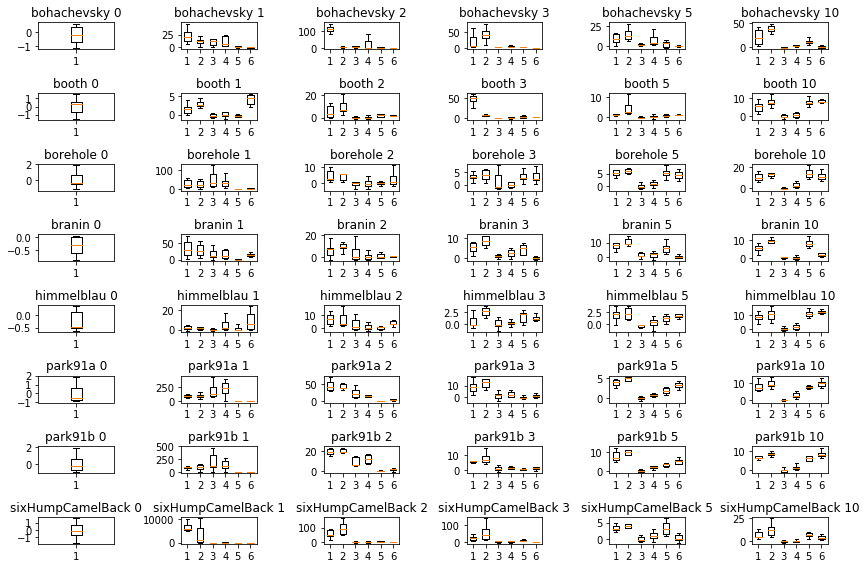

In [14]:
num_funcs = len(df['function'].unique())
num_gen_ints = len(df['gen_int'].unique())

plt.figure(figsize=(12,8))
idx = 0
for func, func_df in df.groupby(by=['function']):
    for gen_int, gen_int_df in func_df.groupby(by=['gen_int']):
        idx += 1
        sub_df = gen_int_df[(gen_int_df['function']==func) & (df['gen_int']==gen_int)]
        labels, data = zip(*[(key, values['time']) for key, values in sub_df.groupby(by=['surrogate', 'usage'])])
        
        min_mean = np.argmin(np.array([dat.mean() for dat in data]))
        mean, std = data[min_mean].mean(), data[min_mean].std()
        
        data = [(dat-mean)/std for dat in data]
        
        plt.subplot(num_funcs, num_gen_ints, idx)
        plt.boxplot(data, sym='')
        plt.title(func + ' ' + str(gen_int))
#         plt.xticks(np.arange(len(labels))+1, labels, rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()